In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
Net = 'EfficientNet'



In [140]:

if Net == 'EfficientNet':
    path = '/exp_10_2/'  # the path of output file
    Repeat = 9  # number of experiments

In [141]:
# Total_budget//period

In [142]:
# np.mean(data[::3,1,-20:],axis = 1).shape

In [143]:
Total_budget = 60
period = 10

# path = 'exp_10_2/'
for dataset_name in ['CIFAR10']:
    
    Models = np.zeros((7,Total_budget//period,Repeat ))
    
    Transpoint =  np.zeros((2,Repeat))
    
    for run_index in range(Repeat):


        name =  f'{dataset_name}_{run_index}'
    #     np.save(path+name+'.npy', results)
        result = np.load(Net+path+name+'.npy',allow_pickle=True)
        
        [acc_rand_list, acc_entropy_list, acc_margin_list, acc_base_list, acc_dpp_list_old,acc_a1_list,acc_a2_list, Status_list1, Status_list2, e_index,margin_index,base_index,dpp_index,a1_index,a2_index ] = result
        
        
        for j in range(5):
            data = result[j]
            Models[j,:,run_index] = np.mean(data[::period,1,-20:],axis = 1)
        
#         Transpoint[0,run_index] = np.mean(Status_list1)
#         Transpoint[1,run_index] = np.mean(Status_list2)
        

In [144]:
# Status_list1

In [145]:
#


In [146]:
Summaray = np.zeros((7,Total_budget//period))
Summaray_var = np.zeros((7,Total_budget//period))
for j in range(7):
    for i in range(Total_budget//period):
        Summaray[j,i] = np.mean(Models[j,i,:])
        
        Summaray_var[j,i] = np.var(Models[j,i,:])

In [147]:
# fig=plt.figure(dpi=500)
font1={'font.family':'serif',
        'font.serif':'Times New Roman',
        'font.style':'normal',
        'font.weight':'bold'}#or large,small

       
plt.rcParams.update(font1)
plt.rcParams['text.usetex'] = False

# ax = fig.add_subplot(111)
# plt.rc('xtick', labelsize=18) 
# plt.rc('ytick', labelsize=18) 
# plt.rc('axes', labelsize=18) 
# plt.rc('axes', titlesize=18) 
# plt.rc('legend', fontsize=12)

In [148]:
def plot_with_variance(reward_mean, reward_std, color='yellow', savefig_dir=None,xaxis =None):
    """plot_with_variance
        reward_mean: typr list, containing all the means of reward summmary scalars collected during training
        reward_std: type list, containing all variance
        savefig_dir: if not None, this must be a str representing the directory to save the figure
    """
    half_reward_std = reward_std / 2.0
    lower = [x - y for x, y in zip(reward_mean, half_reward_std)]
    upper = [x + y for x, y in zip(reward_mean, half_reward_std)]
    if xaxis is None:
        xaxis = list(range(len(lower)))
    plt.plot(xaxis, reward_mean, color)
    plt.fill_between(xaxis, lower, upper, color=color[0], alpha=0.2)
#     plt.grid()
#     plt.xlabel('Episode')
#     plt.ylabel('Average reward')
#     plt.title('The convergence of rewards')
    if savefig_dir is not None and type(savefig_dir) is str:
        plt.savefig(savefig_dir, format='svg')
    plt.rc('xtick', labelsize=18) 
    plt.rc('ytick', labelsize=18) 
    plt.rc('axes', labelsize=18) 
    plt.rc('axes', titlesize=18) 
    plt.rc('legend', fontsize=12)
#     plt.show()

In [149]:
color_space = ['m', 'm', 'r','g','b','y' ,'k-.']
Method_index = [5,6,4,3,1,2,0]

In [150]:
Method_inde2x = [4,3,1,2,0]

In [151]:
# plot_with_variance(Summaray[j,:],np.sqrt(Summaray_var[j,:]),color='m')

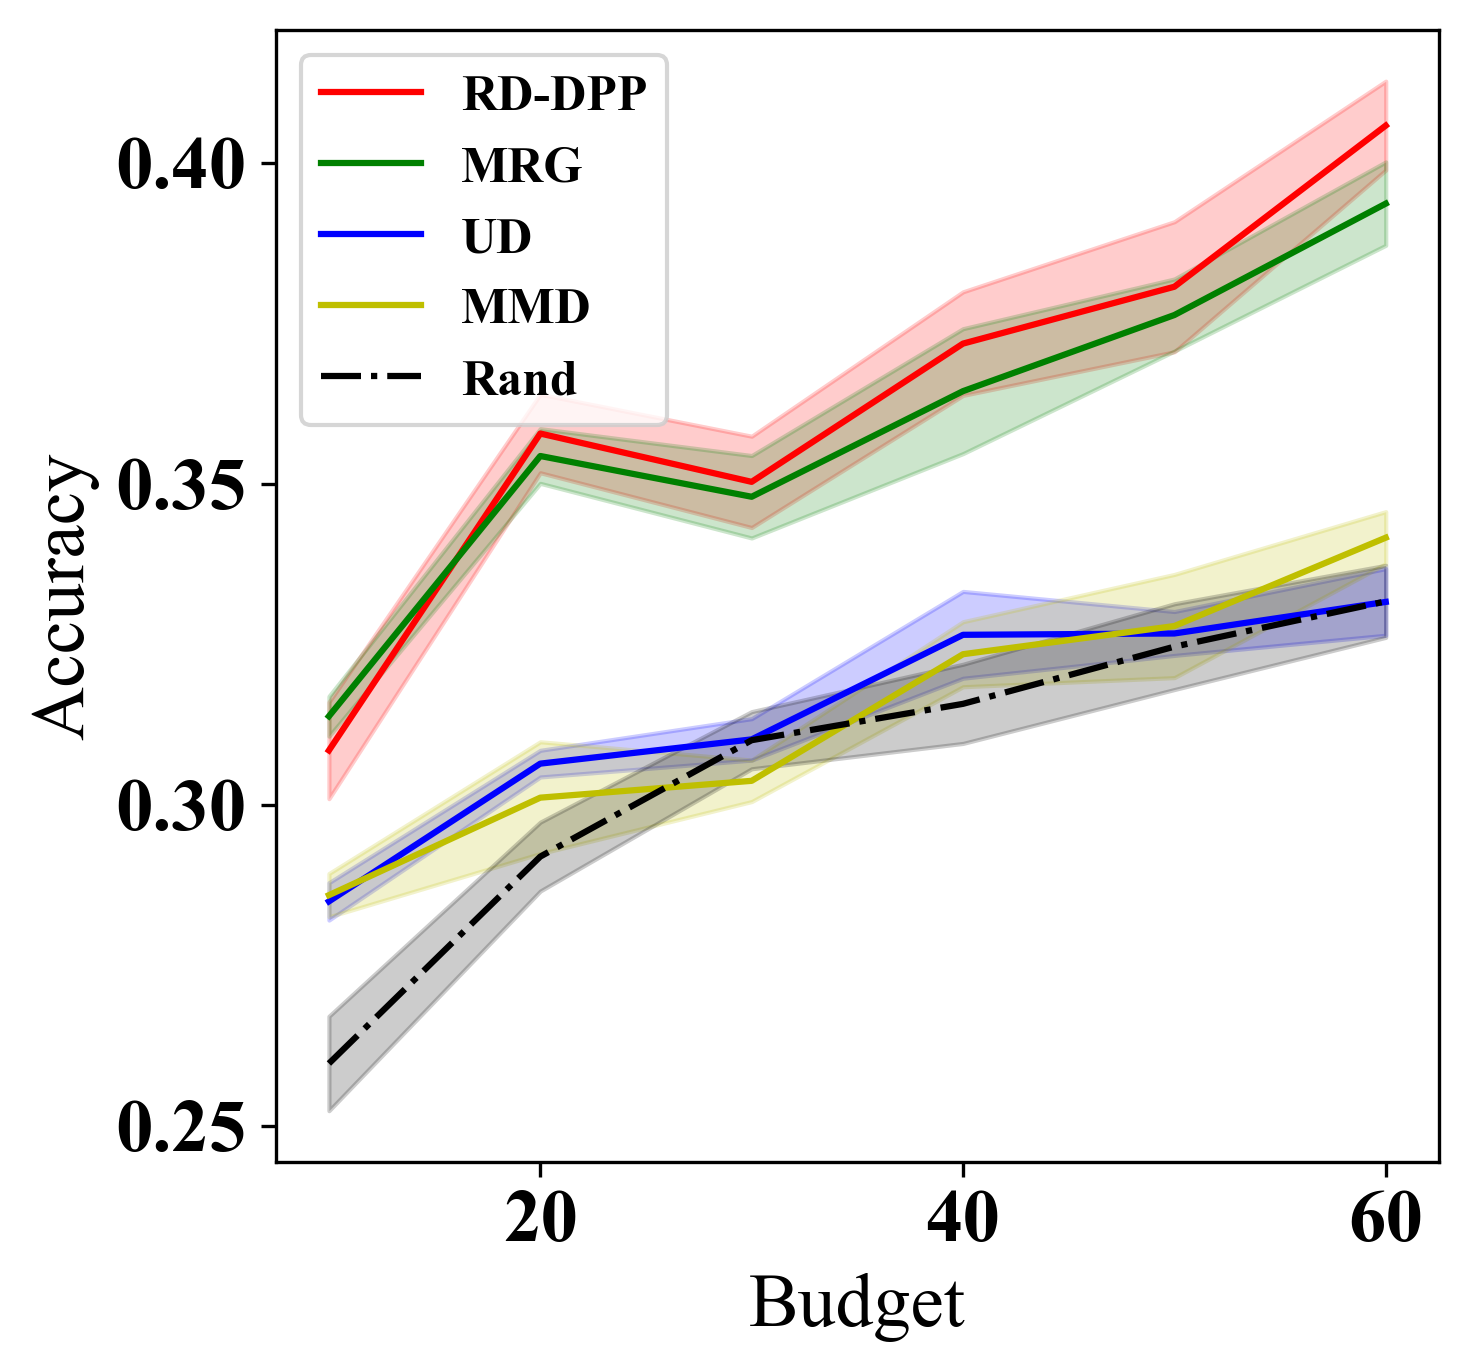

In [154]:
plt.figure(figsize= (5,5),dpi=300)


xaxis = np.array(range(1,1+Total_budget//period))*period

for j in range(7):
    if j !=0 and j !=1:
        idx = Method_index[j]
        plot_with_variance(Summaray[idx,:],np.sqrt(Summaray_var[idx,:]),color = color_space[j],xaxis=xaxis)

plt.xlabel('Budget')
plt.ylabel('Accuracy')
# plt.legend(['rand','entropy','min-margin','margin gain','dpp','ada 0.5', 'ada 0.2'])
# L = ['Rand','Uncertainty Dec.','Min Margin Dec.','Marginal Rate Gain','RD-DPP (only diversity)','RD-DPP (Two stage)']
L2 = ['Rand','UD','MMD','MRG','RD-DPP','RD-DPP(TWO)']
plt.legend(np.array(L2)[Method_inde2x])

# plt.axvline(avg_trans*period,color='gray',linestyle=':')
plt.savefig(f'{Net}_{dataset_name}_{period}.png', bbox_inches = 'tight')

In [155]:
# save to csv


In [156]:
S=Summaray[Method_inde2x,:]
SVAR = Summaray_var[Method_inde2x,:]

In [157]:
per1 = np.zeros(S.shape,dtype=object)


In [158]:
for i in range(per1.shape[0]):
    for j in range(per1.shape[1]):
        per1[i,j] = format(S[i,j]*100,'.2f')

In [159]:
S.shape

(5, 6)

In [160]:
import pandas as pd
df1 = pd.DataFrame(per1, columns = xaxis, index =np.array(L)[Method_inde2x])


In [161]:
df1

,10,20,30,40,50,60
RD-DPP (only diversity),30.85,35.79,35.03,37.19,38.07,40.58
Marginal Rate Gain,31.39,35.44,34.80,36.45,37.63,39.37
Uncertainty Dec.,28.50,30.65,31.03,32.65,32.67,33.16
Min Margin Dec.,28.60,30.12,30.38,32.35,32.79,34.16
Rand,25.98,29.20,31.01,31.58,32.47,33.17


In [77]:
# df1.to_csv(f'{Net}_{dataset_name}_1_{period}.csv') 

In [78]:
per2 = np.zeros((S.shape),dtype=object)
for i in range(per1.shape[0]):
    for j in range(per1.shape[1]):
        per2[i,j] = format(S[i,j]*100,'.2f')+'+-'+format(np.sqrt(SVAR[i,j])*100,'.2f')

In [79]:
df2 = pd.DataFrame(per2, columns = xaxis, index =np.array(L)[Method_inde2x])
